# Titanic Survival Prediction - Data Cleaning
# ============================================

# ## 📋 Objetivo
# Limpiar y preparar el dataset del Titanic para el modelado:
# - Manejar valores faltantes (Age: 19.9%, Cabin: 77.1%, Embarked: 0.2%)
# - Detectar y tratar outliers
# - Eliminar variables irrelevantes
# - Validar consistencia de datos
# - Crear dataset limpio para feature engineering

## 1. Importación de Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Funciones helper
import sys
import os
sys.path.append('../src')
from utils.helpers import save_current_plot

In [2]:
# Configuración
warnings.filterwarnings("ignore")
plt.style.use("seaborn-v0_8")
sns.set_palette("husl")

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


## 2. Carga de Datos y Backup

In [10]:
# Cargar dataset original
df_original = pd.read_csv("../data/raw/titanic.csv")
df = df_original.copy()  # Copia de trabajo

print("🚢 INICIO DE LIMPIEZA DE DATOS")
print("=" * 40)
print(f"📊 Dataset original: {df.shape}")
print(f"👥 Total de registros: {len(df)}")

# Backup de datos originales
print("💾 Creando backup de datos originales...")

🚢 INICIO DE LIMPIEZA DE DATOS
📊 Dataset original: (891, 12)
👥 Total de registros: 891
💾 Creando backup de datos originales...


## 3. Análisis Inicial de Calidad de Datos


🔍 ANÁLISIS DE CALIDAD DE DATOS
Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

❌ VALORES FALTANTES DETALLADOS:
                  Column  Missing_Count  Missing_Percentage Data_Type
Cabin              Cabin            687               77.10    object
Age      

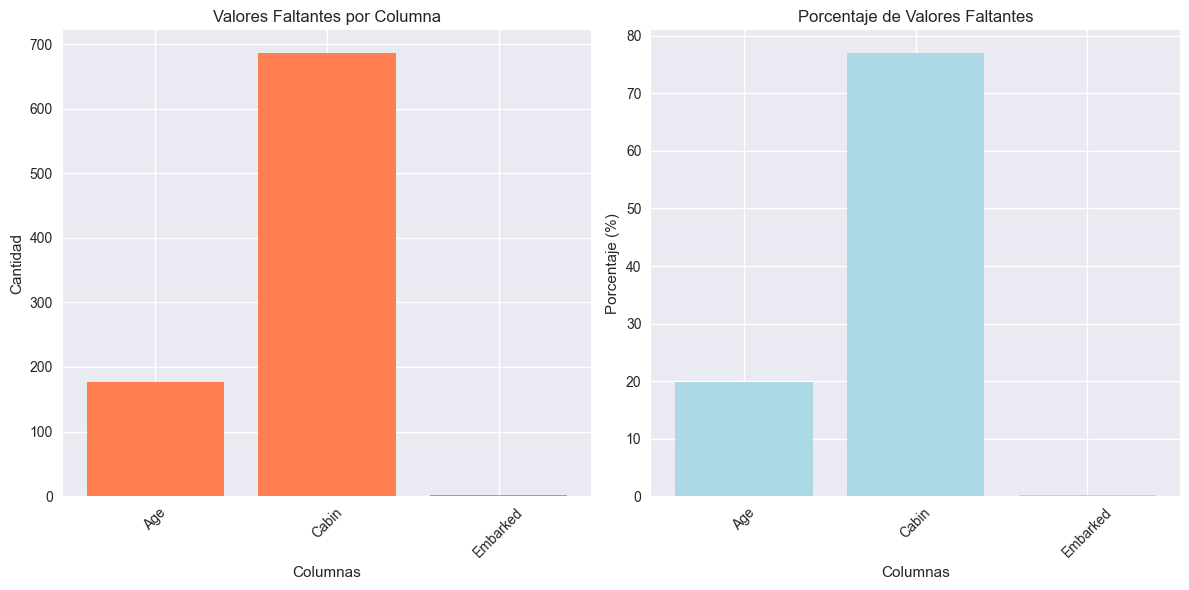

In [11]:
print("\n🔍 ANÁLISIS DE CALIDAD DE DATOS")
print("=" * 35)

# Información general
print("Información del dataset:")
print(df.info())

# Valores faltantes
print("\n❌ VALORES FALTANTES DETALLADOS:")
missing_analysis = pd.DataFrame(
    {
        "Column": df.columns,
        "Missing_Count": df.isnull().sum(),
        "Missing_Percentage": (df.isnull().sum() / len(df) * 100).round(2),
        "Data_Type": df.dtypes,
    }
)
missing_analysis = missing_analysis.sort_values("Missing_Count", ascending=False)
print(missing_analysis)

# Visualizar valores faltantes
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
missing_data = df.isnull().sum()
missing_data_filtered = missing_data[missing_data > 0]
plt.bar(missing_data_filtered.index, missing_data_filtered.values, color="coral")
plt.title("Valores Faltantes por Columna")
plt.xlabel("Columnas")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
missing_percentage = missing_data / len(df) * 100
missing_percentage_filtered = missing_percentage[missing_percentage > 0]
plt.bar(
    missing_percentage_filtered.index,
    missing_percentage_filtered.values,
    color="lightblue",
)
plt.title("Porcentaje de Valores Faltantes")
plt.xlabel("Columnas")
plt.ylabel("Porcentaje (%)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 4. Estrategia de Limpieza por Variable

In [12]:
print("\n🎯 ESTRATEGIA DE LIMPIEZA")
print("=" * 30)


🎯 ESTRATEGIA DE LIMPIEZA


### 4.1 Variables a Eliminar

In [13]:
print("🗑️ ELIMINACIÓN DE VARIABLES IRRELEVANTES:")

# Variables identificadas como no predictivas en EDA
columns_to_drop = ["PassengerId", "Name", "Ticket"]

print(f"Variables a eliminar: {columns_to_drop}")
print("Razones:")
print("- PassengerId: Identificador único, no tiene valor predictivo")
print("- Name: Información personal, extraeremos títulos por separado")
print("- Ticket: Código alfanumérico sin patrón claro")

# Eliminar variables
df_clean = df.drop(columns=columns_to_drop)
print(f"✅ Variables eliminadas. Nueva dimensión: {df_clean.shape}")

🗑️ ELIMINACIÓN DE VARIABLES IRRELEVANTES:
Variables a eliminar: ['PassengerId', 'Name', 'Ticket']
Razones:
- PassengerId: Identificador único, no tiene valor predictivo
- Name: Información personal, extraeremos títulos por separado
- Ticket: Código alfanumérico sin patrón claro
✅ Variables eliminadas. Nueva dimensión: (891, 9)


### 4.2 Manejo de Variable Cabin (77.1% faltantes)


🏠 MANEJO DE VARIABLE CABIN:
Valores faltantes: 687 (77.1%)
Registros con cabina: 204
Registros sin cabina: 687

Supervivencia por disponibilidad de cabina:
Survived       0    1  All
Cabin_Known               
0            481  206  687
1             68  136  204
All          549  342  891

Porcentajes:
Survived        0     1
Cabin_Known            
0            70.0  30.0
1            33.3  66.7
✅ Gráfico guardado: ../results/figures/eda_plots\cabin_analysis.png


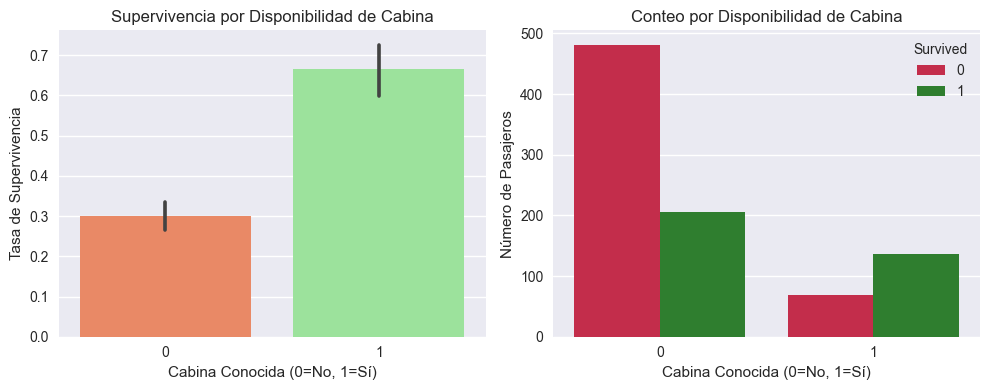

✅ Variable Cabin reemplazada por Cabin_Known (binaria)


In [14]:
print("\n🏠 MANEJO DE VARIABLE CABIN:")
print(
    f"Valores faltantes: {df_clean['Cabin'].isnull().sum()} ({df_clean['Cabin'].isnull().mean()*100:.1f}%)"
)

# Analizar patrones en Cabin
cabin_available = df_clean["Cabin"].notna()
print(f"Registros con cabina: {cabin_available.sum()}")
print(f"Registros sin cabina: {(~cabin_available).sum()}")

# Crear variable binaria: tenía cabina asignada o no
df_clean["Cabin_Known"] = cabin_available.astype(int)

# Analizar supervivencia por disponibilidad de cabina
cabin_survival = pd.crosstab(
    df_clean["Cabin_Known"], df_clean["Survived"], margins=True
)
print("\nSupervivencia por disponibilidad de cabina:")
print(cabin_survival)

cabin_survival_pct = (
    pd.crosstab(df_clean["Cabin_Known"], df_clean["Survived"], normalize="index") * 100
)
print("\nPorcentajes:")
print(cabin_survival_pct.round(1))

# Visualización
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.barplot(
    data=df_clean, x="Cabin_Known", y="Survived", palette=["coral", "lightgreen"]
)
plt.title("Supervivencia por Disponibilidad de Cabina")
plt.xlabel("Cabina Conocida (0=No, 1=Sí)")
plt.ylabel("Tasa de Supervivencia")

plt.subplot(1, 2, 2)
sns.countplot(
    data=df_clean, x="Cabin_Known", hue="Survived", palette=["crimson", "forestgreen"]
)
plt.title("Conteo por Disponibilidad de Cabina")
plt.xlabel("Cabina Conocida (0=No, 1=Sí)")
plt.ylabel("Número de Pasajeros")

plt.tight_layout()
save_current_plot("cabin_analysis", "../results/figures/eda_plots")
plt.show()


# Eliminar variable Cabin original
df_clean = df_clean.drop("Cabin", axis=1)
print("✅ Variable Cabin reemplazada por Cabin_Known (binaria)")

### 4.3 Manejo de Variable Embarked (0.2% faltantes)


⚓ MANEJO DE VARIABLE EMBARKED:
Valores faltantes: 2 (0.2%)

Registros con Embarked faltante:
     Pclass     Sex   Age  Fare  Survived
61        1  female  38.0  80.0         1
829       1  female  62.0  80.0         1

Distribución de puertos:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
Puerto más frecuente: S (644 pasajeros)
✅ Valores faltantes imputados con moda: 'S'
Verificación - Embarked faltantes después: 0

👶👴 MANEJO DE VARIABLE AGE:
Valores faltantes: 177 (19.9%)

Estadísticas de Age (valores no nulos):
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Patrones de Age faltante por otras variables:

Por género:
Age     False  True  All
Sex                     
female    261    53  314
male      453   124  577
All       714   177  891

Por clase:
Age     False  True  All
Pclass                  
1         186    30  216
2    

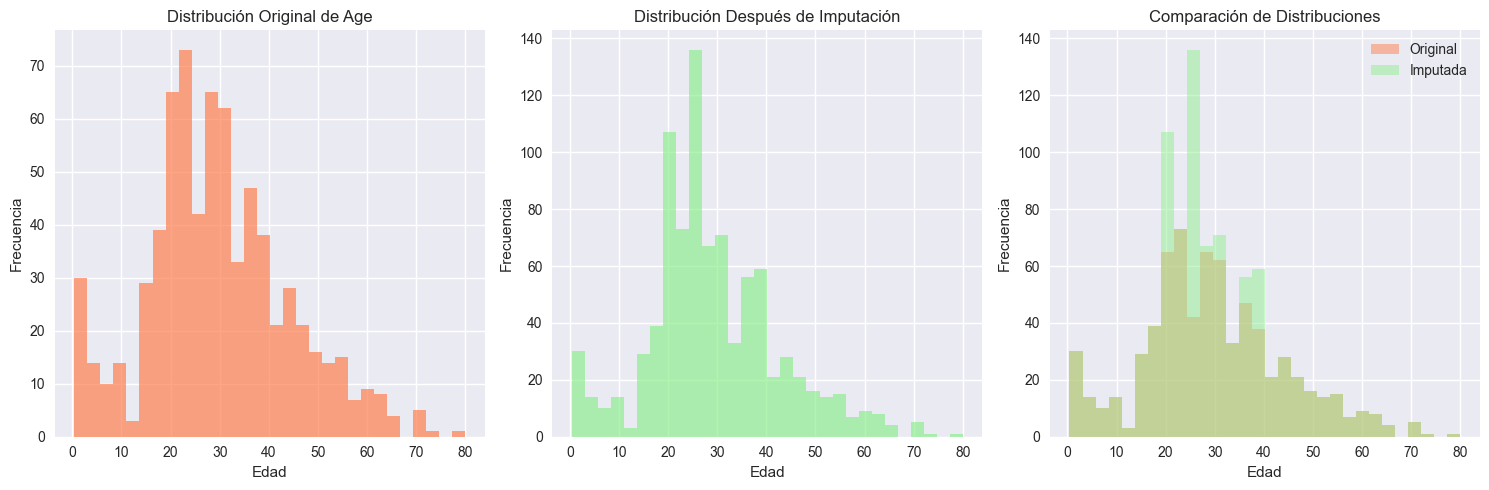

In [15]:
print("\n⚓ MANEJO DE VARIABLE EMBARKED:")
print(
    f"Valores faltantes: {df_clean['Embarked'].isnull().sum()} ({df_clean['Embarked'].isnull().mean()*100:.1f}%)"
)

# Analizar los registros con Embarked faltante
missing_embarked = df_clean[df_clean["Embarked"].isnull()]
print("\nRegistros con Embarked faltante:")
print(missing_embarked[["Pclass", "Sex", "Age", "Fare", "Survived"]])

# Distribución de puertos
embarked_counts = df_clean["Embarked"].value_counts()
print(f"\nDistribución de puertos:")
print(embarked_counts)
print(
    f"Puerto más frecuente: {embarked_counts.index[0]} ({embarked_counts.iloc[0]} pasajeros)"
)

# Imputar con la moda (Southampton - S)
mode_embarked = df_clean["Embarked"].mode()[0]
df_clean["Embarked"].fillna(mode_embarked, inplace=True)

print(f"✅ Valores faltantes imputados con moda: '{mode_embarked}'")
print(
    f"Verificación - Embarked faltantes después: {df_clean['Embarked'].isnull().sum()}"
)

# ### 4.4 Manejo de Variable Age (19.9% faltantes)

print("\n👶👴 MANEJO DE VARIABLE AGE:")
print(
    f"Valores faltantes: {df_clean['Age'].isnull().sum()} ({df_clean['Age'].isnull().mean()*100:.1f}%)"
)

# Estadísticas básicas de Age
print("\nEstadísticas de Age (valores no nulos):")
print(df_clean["Age"].describe())

# Analizar patrones de Age faltantes
age_missing = df_clean["Age"].isnull()
print(f"\nPatrones de Age faltante por otras variables:")

# Por género
age_missing_by_sex = pd.crosstab(df_clean["Sex"], age_missing, margins=True)
print("\nPor género:")
print(age_missing_by_sex)

# Por clase
age_missing_by_class = pd.crosstab(df_clean["Pclass"], age_missing, margins=True)
print("\nPor clase:")
print(age_missing_by_class)

# Estrategia de imputación: mediana por grupo (Sex + Pclass)
print("\n🔧 ESTRATEGIA DE IMPUTACIÓN:")
print("Usando mediana por grupo (Sex + Pclass)")

# Calcular medianas por grupo
age_medians = df_clean.groupby(["Sex", "Pclass"])["Age"].median()
print("\nMedianas por grupo:")
print(age_medians)


# Función de imputación
def impute_age(row):
    if pd.isnull(row["Age"]):
        return age_medians[row["Sex"], row["Pclass"]]
    return row["Age"]


# Aplicar imputación
df_clean["Age"] = df_clean.apply(impute_age, axis=1)

print(f"✅ Age imputada. Valores faltantes después: {df_clean['Age'].isnull().sum()}")

# Visualizar distribución antes y después
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
df_original["Age"].hist(bins=30, alpha=0.7, color="coral", label="Original")
plt.title("Distribución Original de Age")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")

plt.subplot(1, 3, 2)
df_clean["Age"].hist(
    bins=30, alpha=0.7, color="lightgreen", label="Después de Imputación"
)
plt.title("Distribución Después de Imputación")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")

plt.subplot(1, 3, 3)
df_original["Age"].hist(bins=30, alpha=0.5, color="coral", label="Original")
df_clean["Age"].hist(bins=30, alpha=0.5, color="lightgreen", label="Imputada")
plt.title("Comparación de Distribuciones")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.legend()

plt.tight_layout()
save_current_plot("age_imputation_comparison", "../results/figures/eda_plots")
plt.show()

## 5. Detección y Tratamiento de Outliers


🎯 DETECCIÓN DE OUTLIERS

Age:
  Outliers detectados: 33 (3.7%)
  Rango normal: [-0.25, 57.75]
  Valores outliers: [np.float64(58.0), np.float64(59.0), np.float64(60.0), np.float64(61.0), np.float64(62.0), np.float64(63.0), np.float64(64.0), np.float64(65.0), np.float64(66.0), np.float64(70.0), np.float64(70.5), np.float64(71.0), np.float64(74.0), np.float64(80.0)]

SibSp:
  Outliers detectados: 46 (5.2%)
  Rango normal: [-1.50, 2.50]
  Valores outliers: [np.int64(3), np.int64(4), np.int64(5), np.int64(8)]

Parch:
  Outliers detectados: 213 (23.9%)
  Rango normal: [0.00, 0.00]
  Valores outliers: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]

Fare:
  Outliers detectados: 116 (13.0%)
  Rango normal: [-26.72, 65.63]
  Valores outliers: [np.float64(66.6), np.float64(69.3), np.float64(69.55), np.float64(71.0), np.float64(71.2833), np.float64(73.5), np.float64(75.25), np.float64(76.2917), np.float64(76.7292), np.float64(77.2875), np.float64(77.9583), np.floa

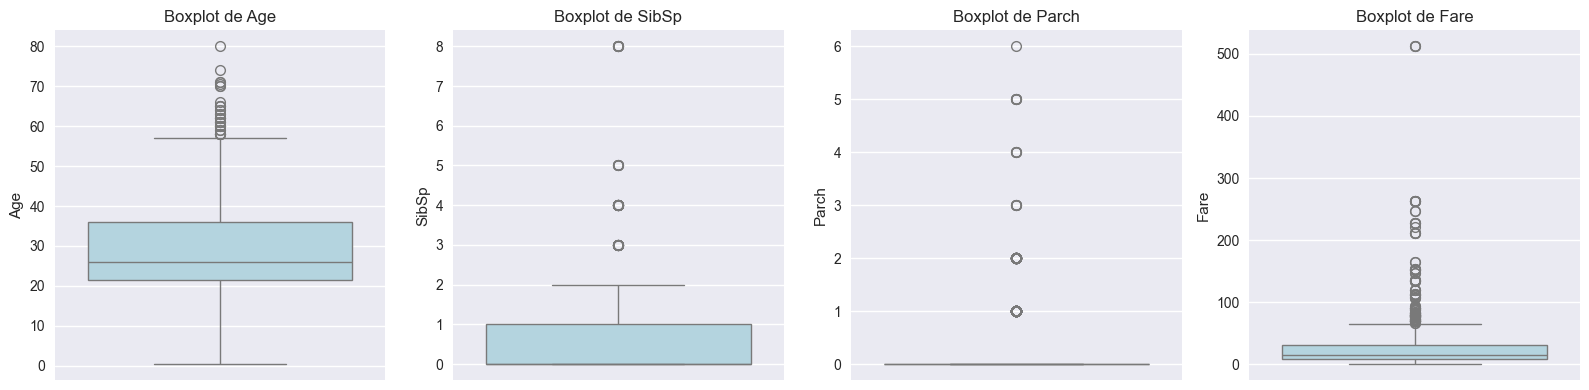

In [16]:
print("\n🎯 DETECCIÓN DE OUTLIERS")
print("=" * 25)

# Variables numéricas para análisis de outliers
numeric_vars = ["Age", "SibSp", "Parch", "Fare"]


def detect_outliers_iqr(data, column):
    """Detecta outliers usando método IQR"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound


# Análisis de outliers por variable
outliers_summary = {}

for var in numeric_vars:
    outliers, lower, upper = detect_outliers_iqr(df_clean, var)
    outliers_summary[var] = {
        "count": len(outliers),
        "percentage": len(outliers) / len(df_clean) * 100,
        "lower_bound": lower,
        "upper_bound": upper,
    }

    print(f"\n{var}:")
    print(
        f"  Outliers detectados: {len(outliers)} ({len(outliers)/len(df_clean)*100:.1f}%)"
    )
    print(f"  Rango normal: [{lower:.2f}, {upper:.2f}]")
    if len(outliers) > 0:
        print(f"  Valores outliers: {sorted(outliers[var].unique())}")

# Visualización de outliers
plt.figure(figsize=(16, 4))

for i, var in enumerate(numeric_vars, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(data=df_clean, y=var, color="lightblue")
    plt.title(f"Boxplot de {var}")

plt.tight_layout()
save_current_plot("outliers_detection", "../results/figures/eda_plots")
plt.show()

5.1 Tratamiento Específico de Outliers

In [17]:
print("\n🔧 TRATAMIENTO DE OUTLIERS:")

# Fare: Analizar outliers extremos
fare_outliers, _, fare_upper = detect_outliers_iqr(df_clean, "Fare")
print(f"\nFare - Outliers superiores a ${fare_upper:.2f}:")
extreme_fare = df_clean[df_clean["Fare"] > fare_upper].sort_values(
    "Fare", ascending=False
)
print(extreme_fare[["Pclass", "Sex", "Age", "Fare", "Survived"]].head())

# Decisión: Mantener outliers de Fare (pueden ser legítimos - suite de lujo)
print("✅ Decisión: Mantener outliers de Fare (posibles suites de lujo)")

# Age: Verificar edades extremas
age_outliers, age_lower, age_upper = detect_outliers_iqr(df_clean, "Age")
print(f"\nAge - Outliers:")
print(f"Menores a {age_lower:.1f} años: {len(df_clean[df_clean['Age'] < age_lower])}")
print(f"Mayores a {age_upper:.1f} años: {len(df_clean[df_clean['Age'] > age_upper])}")

extreme_ages = df_clean[(df_clean["Age"] < age_lower) | (df_clean["Age"] > age_upper)]
print("\nEdades extremas:")
print(extreme_ages[["Sex", "Age", "Pclass", "Survived"]].sort_values("Age"))

# Decisión: Mantener outliers de Age (bebés y ancianos son realistas en 1912)
print("✅ Decisión: Mantener outliers de Age (demográficamente realistas)")

# SibSp y Parch: Familias grandes
sibsp_outliers = df_clean[df_clean["SibSp"] > 3]
parch_outliers = df_clean[df_clean["Parch"] > 3]

print(f"\nFamilias grandes:")
print(f"SibSp > 3: {len(sibsp_outliers)} familias")
print(f"Parch > 3: {len(parch_outliers)} familias")

# Decisión: Mantener (familias grandes eran comunes en 1912)
print("✅ Decisión: Mantener familias grandes (históricamente válidas)")


🔧 TRATAMIENTO DE OUTLIERS:

Fare - Outliers superiores a $65.63:
     Pclass     Sex   Age      Fare  Survived
258       1  female  35.0  512.3292         1
737       1    male  35.0  512.3292         1
679       1    male  36.0  512.3292         1
27        1    male  19.0  263.0000         0
341       1  female  24.0  263.0000         1
✅ Decisión: Mantener outliers de Fare (posibles suites de lujo)

Age - Outliers:
Menores a -0.2 años: 0
Mayores a 57.8 años: 33

Edades extremas:
        Sex   Age  Pclass  Survived
11   female  58.0       1         1
195  female  58.0       1         1
268  female  58.0       1         1
487    male  58.0       1         0
659    male  58.0       1         0
94     male  59.0       3         0
232    male  59.0       2         0
366  female  60.0       1         1
587    male  60.0       1         1
684    male  60.0       2         0
694    male  60.0       1         0
625    male  61.0       1         0
326    male  61.0       3         0
170    m

## 6. Validación de Consistencia

In [18]:
print("\n✅ VALIDACIÓN DE CONSISTENCIA")
print("=" * 30)

# Verificar rangos de variables
consistency_checks = {
    "Age": (df_clean["Age"] >= 0) & (df_clean["Age"] <= 120),
    "Fare": df_clean["Fare"] >= 0,
    "SibSp": df_clean["SibSp"] >= 0,
    "Parch": df_clean["Parch"] >= 0,
    "Pclass": df_clean["Pclass"].isin([1, 2, 3]),
    "Sex": df_clean["Sex"].isin(["male", "female"]),
    "Embarked": df_clean["Embarked"].isin(["C", "Q", "S"]),
    "Survived": df_clean["Survived"].isin([0, 1]),
}

print("Verificación de consistencia:")
for var, check in consistency_checks.items():
    inconsistent = (~check).sum()
    print(f"  {var}: {inconsistent} valores inconsistentes")
    if inconsistent > 0:
        print(f"    Valores problemáticos: {df_clean[~check][var].unique()}")


✅ VALIDACIÓN DE CONSISTENCIA
Verificación de consistencia:
  Age: 0 valores inconsistentes
  Fare: 0 valores inconsistentes
  SibSp: 0 valores inconsistentes
  Parch: 0 valores inconsistentes
  Pclass: 0 valores inconsistentes
  Sex: 0 valores inconsistentes
  Embarked: 0 valores inconsistentes
  Survived: 0 valores inconsistentes


## 7. Verificación Final del Dataset Limpio

In [19]:
print("\n🏁 DATASET LIMPIO - VERIFICACIÓN FINAL")
print("=" * 40)

print("📊 Dimensiones finales:")
print(f"  Original: {df_original.shape}")
print(f"  Limpio: {df_clean.shape}")
print(f"  Filas eliminadas: {len(df_original) - len(df_clean)}")
print(f"  Columnas eliminadas: {len(df_original.columns) - len(df_clean.columns)}")

print("\n📋 Información del dataset limpio:")
print(df_clean.info())

print("\n❌ Verificación final de valores faltantes:")
final_missing = df_clean.isnull().sum()
print(final_missing[final_missing > 0])

if final_missing.sum() == 0:
    print("✅ ¡Perfecto! No quedan valores faltantes")
else:
    print("⚠️ Aún hay valores faltantes por manejar")

print("\n📈 Estadísticas descriptivas finales:")
print(df_clean.describe())


🏁 DATASET LIMPIO - VERIFICACIÓN FINAL
📊 Dimensiones finales:
  Original: (891, 12)
  Limpio: (891, 9)
  Filas eliminadas: 0
  Columnas eliminadas: 3

📋 Información del dataset limpio:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    object 
 8   Cabin_Known  891 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB
None

❌ Verificación final de valores faltantes:
Series([], dtype: int64)
✅ ¡Perfecto! No quedan valores faltantes

📈 Estadísticas descriptivas finales:
         Survived      Pclass    

## 8. Resumen de Cambios Realizados

In [20]:
print("\n📝 RESUMEN DE LIMPIEZA DE DATOS")
print("=" * 35)

changes_summary = {
    "Variables eliminadas": ["PassengerId", "Name", "Ticket"],
    "Cabin": "Convertida a variable binaria 'Cabin_Known'",
    "Embarked": "2 valores faltantes imputados con moda ('S')",
    "Age": "177 valores faltantes imputados con mediana por grupo (Sex + Pclass)",
    "Outliers": "Detectados pero mantenidos (históricamente válidos)",
    "Nuevas variables": ["Cabin_Known"],
    "Variables finales": len(df_clean.columns),
    "Registros finales": len(df_clean),
}

for key, value in changes_summary.items():
    print(f"✅ {key}: {value}")


📝 RESUMEN DE LIMPIEZA DE DATOS
✅ Variables eliminadas: ['PassengerId', 'Name', 'Ticket']
✅ Cabin: Convertida a variable binaria 'Cabin_Known'
✅ Embarked: 2 valores faltantes imputados con moda ('S')
✅ Age: 177 valores faltantes imputados con mediana por grupo (Sex + Pclass)
✅ Outliers: Detectados pero mantenidos (históricamente válidos)
✅ Nuevas variables: ['Cabin_Known']
✅ Variables finales: 9
✅ Registros finales: 891


## 9. Guardar Dataset Limpio

In [21]:
print("\n💾 GUARDANDO DATASET LIMPIO")
print("=" * 28)

# Guardar en data/processed/
output_path = "../data/processed/train_processed.csv"
df_clean.to_csv(output_path, index=False)

print(f"✅ Dataset limpio guardado en: {output_path}")
print(f"📊 Archivo guardado: {df_clean.shape[0]} filas × {df_clean.shape[1]} columnas")

# Verificar que se guardó correctamente
df_verify = pd.read_csv(output_path)
print(f"🔍 Verificación: archivo leído correctamente ({df_verify.shape})")


💾 GUARDANDO DATASET LIMPIO
✅ Dataset limpio guardado en: ../data/processed/train_processed.csv
📊 Archivo guardado: 891 filas × 9 columnas
🔍 Verificación: archivo leído correctamente ((891, 9))


## 10. Próximos Pasos

In [22]:
print("\n🚀 PRÓXIMOS PASOS")
print("=" * 18)

next_steps = [
    "Feature Engineering (03_feature_engineering.ipynb)",
    "- Crear variable FamilySize (SibSp + Parch + 1)",
    "- Extraer títulos de nombres (Mr, Mrs, Miss, Master, etc.)",
    "- Crear categorías de edad (Child, Adult, Senior)",
    "- Crear bins de tarifa (Low, Medium, High, Premium)",
    "- Encoding de variables categóricas",
    "- Scaling de variables numéricas",
    "Modelado (04_modeling.ipynb)",
    "- Split train/validation/test",
    "- Implementar algoritmos: Logistic Regression, Random Forest, SVM, Naive Bayes",
    "- Cross-validation y hyperparameter tuning",
]

for i, step in enumerate(next_steps, 1):
    if step.startswith("-"):
        print(f"  {step}")
    else:
        print(f"{i}. {step}")

print("\n✅ ¡Limpieza de datos completada exitosamente!")
print("📊 Dataset listo para Feature Engineering")


🚀 PRÓXIMOS PASOS
1. Feature Engineering (03_feature_engineering.ipynb)
  - Crear variable FamilySize (SibSp + Parch + 1)
  - Extraer títulos de nombres (Mr, Mrs, Miss, Master, etc.)
  - Crear categorías de edad (Child, Adult, Senior)
  - Crear bins de tarifa (Low, Medium, High, Premium)
  - Encoding de variables categóricas
  - Scaling de variables numéricas
8. Modelado (04_modeling.ipynb)
  - Split train/validation/test
  - Implementar algoritmos: Logistic Regression, Random Forest, SVM, Naive Bayes
  - Cross-validation y hyperparameter tuning

✅ ¡Limpieza de datos completada exitosamente!
📊 Dataset listo para Feature Engineering
